# Project 4: West Nile Virus - Data Cleaning
---
# Table of Contents

1. Import libraries
2. Import data
3. Data type
4. Export as csv
---

# Import libraries 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import missingno as msno

# Import data
Weather data from 2007 to 2014 from NOAA is imported for cleaning. Based on the data [dictionary](../input_data/noaa_weather_qclcd_documentation.pdf): 
- "M" represent Missing Data, or data that are not normally reported for the station and "-" represent values that are not available. As such, they will be considered as `NaN`. 
- "T" represent trace amount. They and will be replaced with `0` value. 
- empty string under `codesum` feature replaced with np.nan 

In [2]:
#import data with 'M' and '-' considered as NaN
weather = pd.read_csv('../input_data/weather.csv', na_values=['M', '-', ' '])

In [3]:
#check dataframe
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,NaN,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,NaN,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
#check the shape of the dataframe 
print(f'shape of the weather dataframe: {weather.shape}')

shape of the weather dataframe: (2944, 22)


In [5]:
#change column names to lowercase
weather.columns = weather.columns.str.lower()

In [6]:
#replace 'T' with '0'
weather.replace('\s*T', 0, regex=True, inplace=True)

## Missing values

From the matrix plot be below, most of the values for `depart`, `sunrise`, `sunset`, `depth`, `water1`, `snowfall`, `preciptotal` are missing. 

Reviewing the data dictionary, it stated that some data missing because they are not normally reported for the station. e.g Station 2 at CHICAGO MIDWAY INTL ARPT does not record `sunrise` and `sunset`.

Given that both weather stations are relative close to each other (approx 25km), missing information from station 1 will be imputed from station 2 and vice versa. If information are missing from both stations on the same date, then imputation will be base on the average value between the previous data and the next date.


<AxesSubplot:>

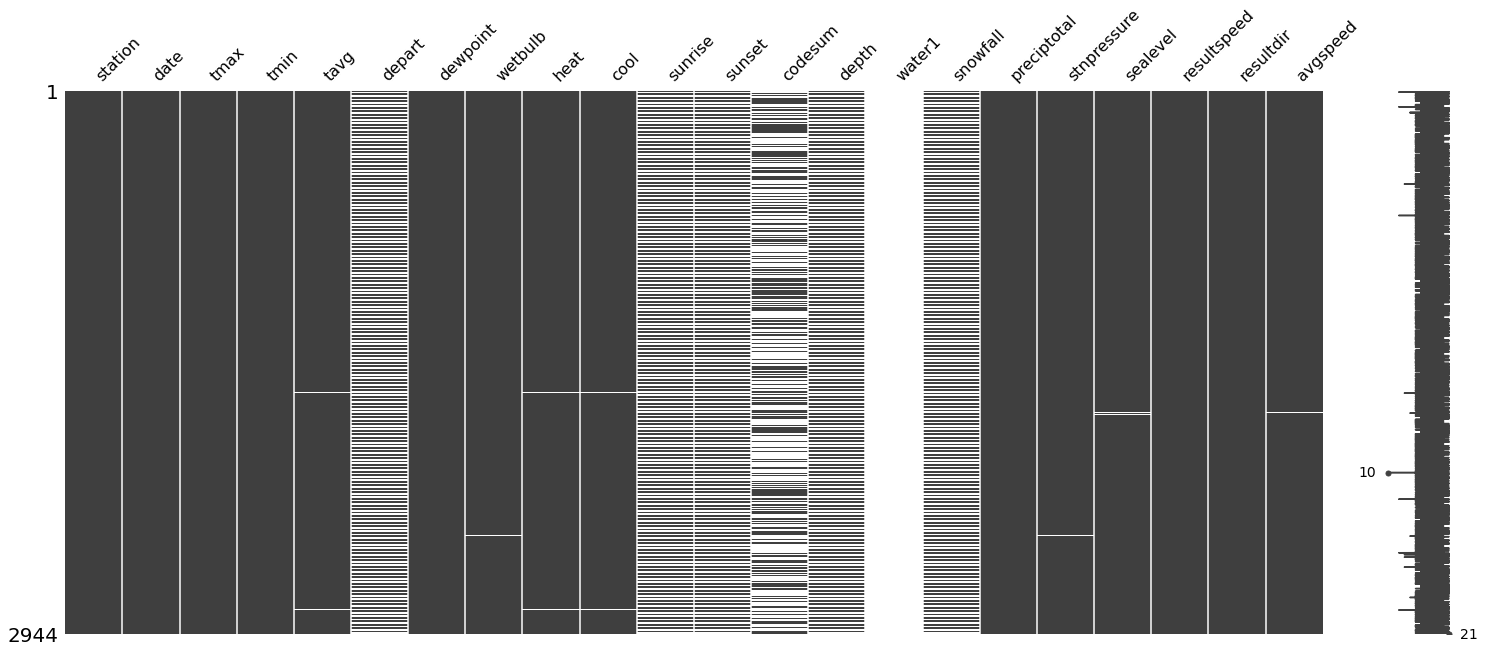

In [7]:
#check distribution of missing value
msno.matrix(weather)

In [8]:
#check sum of missing value
weather.isna().sum()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           4
heat             11
cool             11
sunrise        1472
sunset         1472
codesum        1609
depth          1472
water1         2944
snowfall       1472
preciptotal       2
stnpressure       4
sealevel          9
resultspeed       0
resultdir         0
avgspeed          3
dtype: int64

### Imputing average temperature

In [9]:
#check missing value for average temp
weather[weather['tavg'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78,51,NaN,NaN,42,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,NaN,NaN,68,71.0,NaN,NaN,...,0,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,NaN,NaN,41,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,NaN,NaN,70,74.0,NaN,NaN,...,0,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,NaN,NaN,51,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,NaN,NaN,39,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,NaN,NaN,48,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,NaN,NaN,48,54.0,NaN,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,NaN,NaN,44,50.0,NaN,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,NaN,NaN,43,47.0,NaN,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [10]:
#impute the missing average temp by computing it from max and min temperature
weather['tavg'] = np.where(weather['tavg'].isna(), 
                           (weather['tmax'] + weather['tmin'])/2,
                           weather['tavg'])

### Imputing depart temperature

In [11]:
weather[weather['depart'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,58.0,NaN,40,50.0,7.0,0.0,...,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,NaN,42,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,NaN,39,50.0,5.0,0.0,...,NaN,NaN,NaN,NaN,0,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,67.0,NaN,52,59.0,0.0,2.0,...,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,NaN,40,48.0,8.0,0.0,...,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,45.0,NaN,34,42.0,20.0,0.0,...,NaN,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,NaN,35,42.0,20.0,0.0,...,RA,NaN,NaN,NaN,0,29.41,30.10,5.9,23,6.5


In [12]:
weather['depart'] = weather['depart'].fillna(method='ffill')

### Imputing wet bulb temperature

In [13]:
#check missing value for wetbulb
weather[weather['wetbulb'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
848,1,2009-06-26,86,69,78.0,7.0,60,NaN,0.0,13.0,...,NaN,0.0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73.0,0.0,57,NaN,0.0,8.0,...,NaN,0.0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71.0,-2.0,61,NaN,0.0,6.0,...,RA,0.0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77.0,2.0,63,NaN,0.0,12.0,...,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7


In [14]:
#fill station 2 missing info with station 1 (forward fill)
weather.iloc[2415, 7] = weather.iloc[2414, 7]

In [15]:
#fill station 1 missing info with station 2 (backward fill)
weather['wetbulb'] = weather['wetbulb'].fillna(method='bfill')

### Imputing heat

In [16]:
#check missing value for heat
weather[weather['heat'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78,51,64.5,4.0,42,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,5.0,68,71.0,NaN,NaN,...,0,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,-4.0,41,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,5.0,70,74.0,NaN,NaN,...,0,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,-1.0,51,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,-5.0,39,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,-1.0,48,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,1.0,48,54.0,NaN,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,-1.0,44,50.0,NaN,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,-4.0,43,47.0,NaN,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [17]:
#fill station 2 missing info with station 1 (forward fill)
weather['heat'] = weather['heat'].fillna(method='ffill')

### Imputing cool

In [18]:
#check missing value for heat
weather[weather['cool'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78,51,64.5,4.0,42,50.0,7.0,NaN,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,5.0,68,71.0,0.0,NaN,...,0,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,-4.0,41,47.0,11.0,NaN,...,NaN,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,5.0,70,74.0,0.0,NaN,...,0,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,-1.0,51,61.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,-5.0,39,45.0,16.0,NaN,...,NaN,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,-1.0,48,54.0,5.0,NaN,...,NaN,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,1.0,48,54.0,5.0,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,-1.0,44,50.0,10.0,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,-4.0,43,47.0,15.0,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [19]:
#fill station 2 missing info with station 1 (forward fill)
weather['cool'] = weather['cool'].fillna(method='ffill')

### Impute sunrise hour

In [20]:
weather[weather['sunrise'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,58.0,2.0,40,50.0,7.0,0.0,...,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,4.0,42,50.0,7.0,0.0,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,5.0,39,50.0,5.0,0.0,...,NaN,NaN,NaN,NaN,0,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,67.0,16.0,52,59.0,0.0,2.0,...,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,10.0,40,48.0,8.0,0.0,...,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,45.0,-4.0,34,42.0,20.0,0.0,...,NaN,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,-4.0,35,42.0,20.0,0.0,...,RA,NaN,NaN,NaN,0,29.41,30.10,5.9,23,6.5


In [21]:
weather['sunrise'] = weather['sunrise'].fillna(method='ffill')

### Impute sunset hour

In [22]:
weather[weather['sunset'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,58.0,2.0,40,50.0,7.0,0.0,...,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,4.0,42,50.0,7.0,0.0,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,5.0,39,50.0,5.0,0.0,...,NaN,NaN,NaN,NaN,0,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,67.0,16.0,52,59.0,0.0,2.0,...,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,10.0,40,48.0,8.0,0.0,...,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,45.0,-4.0,34,42.0,20.0,0.0,...,NaN,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,-4.0,35,42.0,20.0,0.0,...,RA,NaN,NaN,NaN,0,29.41,30.10,5.9,23,6.5


In [23]:
weather['sunset'] = weather['sunset'].fillna(method='ffill')

### Dropping codesum, depth, water, and snowfall

Data in the depth, water and snowfall are mostly `0` and have little variance. As such these feature will be dropped. 

In [24]:
#print the list of unique values
print(f"unique values in depth feature :"
      f" {weather['depth'].unique().tolist()}")
print(f"unique values in water1 feature :"
      f" {weather['water1'].unique().tolist()}")
print(f"unique values in water1 feature :"
      f" {weather['snowfall'].unique().tolist()}")
print(f"unique values in depth feature :"
      f" {weather['codesum'].unique().tolist()}")

unique values in depth feature : [0.0, nan]
unique values in water1 feature : [nan]
unique values in water1 feature : ['0.0', nan, 0, '0.1']
unique values in depth feature : [nan, 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 0, 'RA HZ', 'BR HZ FU', 'DZ BR', 'RA BR HZ', 'RA BCFG BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ', 'RA DZ BR', 'RA BR SQ', 'FG+ BR HZ', 'RA SN', 'DZ BR HZ', 'RA BR FU', 'DZ', 'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG BR HZ', 'BR HZ VCFG', 'RA DZ FG+ FG BR', 'FU', 'RA FG BR', 'HZ FU', 'RA BR HZ FU', 'MIFG BCFG BR', 'FG+ BCFG BR', 'FG+', 'RA BR HZ VCFG', 'RA FG+ BR', 'FG BR HZ', 'RA DZ FG+ BR', 'RA DZ FG+ BR HZ', 'RA BR VCFG', 'BCFG BR', 'RA SN BR']


In [25]:
#drop depth, water1, snowfall
weather.drop(columns=['codesum','depth', 'water1', 'snowfall'], inplace=True)

### Impute precipitation

In [26]:
weather[weather['preciptotal'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
117,2,2007-06-28,73,61,67.0,-5.0,56,61.0,0.0,2.0,419.0,1931.0,NaN,29.43,30.07,12.2,2,13.3
119,2,2007-06-29,71,56,64.0,-8.0,56,60.0,1.0,0.0,419.0,1931.0,NaN,29.47,30.11,7.4,2,8.2


In [27]:
weather['preciptotal'] = weather['preciptotal'].fillna(method='ffill')

### Imputing station pressure

In [28]:
#check missing value for pressure
weather[weather['stnpressure'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
87,2,2007-06-13,86,68,77.0,6.0,53,62.0,0.0,12.0,416.0,1927.0,0.00,NaN,NaN,7.0,5,NaN
848,1,2009-06-26,86,69,78.0,7.0,60,67.0,0.0,13.0,418.0,1931.0,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73.0,0.0,57,63.0,0.0,8.0,454.0,1900.0,0.00,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75.0,0.0,55,63.0,0.0,10.0,454.0,1900.0,0.00,NaN,30.07,6.0,6,7.4


In [29]:
#function that return list of index
def impute_list(stn, df):
    '''return list of index based on station 1 or 2'''
    return df[df['station']==stn].index.tolist()

#impute missing info in station 1 from station 2
index_of_stn1 = impute_list(1, weather[weather['stnpressure'].isna()])
for i in index_of_stn1:
    weather.loc[i,'stnpressure'] =  weather.loc[i+1,'stnpressure'] 

#impute missing info in station 2 from station 1
index_of_stn2 = impute_list(2, weather[weather['stnpressure'].isna()])
for i in index_of_stn2:
    weather.loc[i,'stnpressure'] =  weather.loc[i-1,'stnpressure']

#missing value on stn1 and stn2 on 2013-8-10
#impute based on the average of 2 days

previous_day = (weather.loc[2408,'stnpressure']
                + weather.loc[2408,'stnpressure'])/2

next_day = (weather.loc[2412,'stnpressure']
            + weather.loc[2413,'stnpressure'])/2

weather.loc[2410,'stnpressure'] = np.round((previous_day + next_day)/2,2)
weather.loc[2411,'stnpressure'] = np.round((previous_day + next_day)/2,2)

### Imputing sea level pressure

In [30]:
#check missing value for sealevel
weather[weather['sealevel'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
87,2,2007-06-13,86,68,77.0,6.0,53,62.0,0.0,12.0,416.0,1927.0,0.00,29.36,NaN,7.0,5,NaN
832,1,2009-06-18,80,61,71.0,1.0,63,67.0,0.0,6.0,416.0,1929.0,0.12,29.08,NaN,6.7,16,7.9
994,1,2009-09-07,77,59,68.0,1.0,59,62.0,0.0,3.0,523.0,1817.0,0.00,29.39,NaN,5.8,3,4.0
1732,1,2011-09-08,75,57,66.0,0.0,53,59.0,0.0,1.0,524.0,1815.0,0,29.34,NaN,13.0,2,13.4
1745,2,2011-09-14,60,48,54.0,-11.0,45,51.0,11.0,0.0,530.0,1805.0,0,29.47,NaN,6.0,32,NaN
1756,1,2011-09-20,74,49,62.0,0.0,54,58.0,3.0,0.0,537.0,1753.0,0.00,29.26,NaN,7.3,18,7.3
2067,2,2012-08-22,84,72,78.0,-1.0,51,61.0,0.0,5.0,506.0,1843.0,0.00,29.39,NaN,4.7,19,NaN
2090,1,2012-09-03,88,71,80.0,12.0,70,73.0,0.0,15.0,519.0,1824.0,0.00,29.17,NaN,4.6,6,4.4
2743,2,2014-07-23,76,64,70.0,-7.0,56,61.0,0.0,5.0,436.0,1920.0,0.00,29.47,NaN,16.4,2,16.7


In [31]:
#impute missing info in station 1 from station 2
index_of_stn1 = impute_list(1, weather[weather['sealevel'].isna()])
for i in index_of_stn1:
    weather.loc[i,'sealevel'] =  weather.loc[i+1,'sealevel'] 

#impute missing info in station 2 from station 1
index_of_stn2 = impute_list(2, weather[weather['sealevel'].isna()])
for i in index_of_stn2:
    weather.loc[i,'sealevel'] =  weather.loc[i-1,'sealevel']

### Impute average wind speed

In [32]:
weather[weather['avgspeed'].isna()]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
87,2,2007-06-13,86,68,77.0,6.0,53,62.0,0.0,12.0,416.0,1927.0,0.00,29.36,30.09,7.0,5,NaN
1745,2,2011-09-14,60,48,54.0,-11.0,45,51.0,11.0,0.0,530.0,1805.0,0,29.47,30.09,6.0,32,NaN
2067,2,2012-08-22,84,72,78.0,-1.0,51,61.0,0.0,5.0,506.0,1843.0,0.00,29.39,30.07,4.7,19,NaN


In [33]:
weather['avgspeed'] = weather['avgspeed'].fillna(method='ffill')

In [34]:
#check if all data are cleaned
weather.isna().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

# Datatype

In [35]:
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg           float64
depart         float64
dewpoint         int64
wetbulb        float64
heat           float64
cool           float64
sunrise        float64
sunset         float64
preciptotal     object
stnpressure    float64
sealevel       float64
resultspeed    float64
resultdir        int64
avgspeed       float64
dtype: object

In [36]:
#change to numerical data type
weather['preciptotal'] = pd.to_numeric(weather['preciptotal'])

#change to datetime data type
weather['date'] = pd.to_datetime(weather['date'])
weather['sunrise'] = pd.to_datetime(weather['sunrise'], format='%H%M').dt.strftime('%H:%M')
#weather['sunset'] = pd.to_datetime(weather['sunset'], format='%H%M').dt.strftime('%H:%M')

In [37]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,04:48,1849.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,04:48,1849.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,04:47,1850.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,04:47,1850.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,04:46,1851.0,0.0,29.39,30.12,11.7,7,11.9


# Export dataframe 

In [38]:
weather.to_csv('../output_data/weather_clean.csv', index=False)